---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Classificador de Fake News

Vivemos na era digital, onde a informação está mais acessível do que nunca, e continua ficando cada vez mais acessível, de forma mais ágil e ampla.

Apesar dos benefícios que isso traz, também existem problemas e riscos com isso. Aqui, vamos nos preocupar com um dos maiores deles: ***Fake News***
<p align=center>
  <img src="https://img.freepik.com/fotos-gratis/conceito-de-fundo-de-jornal_23-2149501633.jpg?w=740&t=st=1675771784~exp=1675772384~hmac=0b6d90963ebca83517d8768f4cee4ba4934f6c2c81e8af02b9fbe57a63d41da6" height="30%">
</p>

Com certeza você já se deparou com uma dessas. Em uma era de informação, a desinformação acaba sendo o nosso maior problema.

Em suma, ***Fake News*** são, como a tradução literal sugere, Notícias Falsas. Elas podem ir desde um número diferente em uma estatística apresentada, até a notícia de uma acontecimento completamente falso.


## Como isso influencia nossa vida?
As fake news podem influenciar nossa vida de várias maneiras negativas:

* Desinformação: Elas podem distorcer a verdade e passar informações falsas, o que pode levar a decisões erradas e ações equivocadas.

* Polarização: Elas podem ajudar a criar divisões na sociedade, alimentando opiniões extremistas e aumentando a tensão social.

* Confiança nas instituições: As fake news também podem prejudicar a confiança das pessoas nas instituições, como a mídia, a ciência e o sistema político.

* Saúde mental: A exposição frequente às notícias falsas pode afetar a saúde mental, causando ansiedade, estresse e outros problemas.

* É importante que as pessoas desenvolvam a capacidade de identificar e descartar as fake news, buscando sempre fontes confiáveis e verificáveis de informação.

## O Projeto

Hoje e dia, podemos contar com ferramentas que nos ajudem a identificar e filtrar notícias falsas. Com técnicas de *Machine Learning* como **Redes Neuras** essa tarefa de vasculhar diversas fontes de notícias para descobrir o que é falso e o que é factual fica mais fácil.

O objetivo do projeto é treinar um modelo que seja capaz de classificar notícias, com a melhor acurácia possível, entre falsas ou factuais.

Para isso, utilizaremos a biblioteca **Tensorflow** para treinar Redes Neurais que façam esse trabalho por nós.

In [1]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# configurando o notebook
np.random.seed(42)
sns.set_style()

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# habilitando google driver para carregar dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# carregando e verificando os dados
# df_fake
df_fake = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_learning/Fake.csv')
print(df_fake.shape)

# df_true
df_true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_learning/True.csv')
print(df_true.shape)

(23481, 4)
(21417, 4)


In [4]:
# verificando as primeiras entradas df_fake
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# verificando as primeiras entradas df_true
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# incluindo coluna target com 0 para true e 1 para fake
df_fake['Target'] = 1
df_true['Target'] = 0

In [7]:
df_fake.head()

,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [8]:
df_true.head()

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [9]:
# concatenando a base de dados
df = pd.concat([df_fake, df_true], axis=0)
print(df.shape)
df.head()

(44898, 5)


,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


## Os Dados

Nosso conjunto de dados possui quase 45 mil linhas e 5 colunas, das quais temos:

* `title` - Título da notícia
* `text` - Texto da notícia
* `subject` - Assunto da notícia
* `date` - Data em que foi publicada
* `Target` que é nossa variável alvo e está dividida em:
  * True (Factual) = 0
  * Fake (Falsa) = 1

## Tratando os dados

Aqui, estamos lidando com nossa linguagem natural em formato de string, então precisamos de alguns conhecimentos de NLP para tratar esses dados da melhor forma, para que possam ser passados ao nosso modelo com sucesso e, dessa forma, obtermos os resultados que desejamos.

In [10]:
# tratando do texto das notícias
import string
def clean_text(text):
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words

df['text'] = df['text'].apply(clean_text)
df.head()

,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all ame...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devi...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former m...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced ...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas d...,News,"December 25, 2017",1


Agora, precisamos separar nossos dados em treino, validação e teste, para que possamos continuar a trilhar o caminho que nos leva ao modelo.

In [11]:
# separando os datasets em treino, validação e teste
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)
train, validation = train_test_split(train, test_size=0.2)
print('Entradas por Dataset')
print(f'Dataset de Treino:\t{len(train)} linhas.')
print(f'Dataset de Validação:\t{len(validation)} linhas.')
print(f'Dataset de Teste:\t{len(test)} linhas.')

Entradas por Dataset
Dataset de Treino:	26938 linhas.
Dataset de Validação:	6735 linhas.
Dataset de Teste:	11225 linhas.


## Pré-Processamento de Strings - NLP

Aqui neste projeto estamos focando em ***Deep Learning*** e a implementação de **Redes Neurais**, por isso, não iremos nos extender em pré-processamento de Strings.

De qualquer forma, esse é um ponto importante do projeto. Aqui, basicamente o que queremos é simplificar o texto, para que seja mais fácil do nosso modelo processar e entender. Por isso, iremos utilizar uma técnica que se chama ***Tokenizing***.

Em suma, Tokenizing, ou Tokenização, em tradução livre, é um passo que separa longos textos de strings em pedaços de textos mais curtos, chamados de tokens.

<p align=center>
  <img src="https://www.kdnuggets.com/wp-content/uploads/text-tokens-tokenization-manning.jpg" height="30%">
</p>

Para ler mais sobre esse assunto e entender melhor os passos e parâmetros abaixo, deixarei links de referência [aqui](https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html) e [aqui](https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html).

In [12]:
# preparando os dados para o modelo
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train.text)
word_index = tokenizer.word_index

# aplicando técnicas tokenizing e padding
training_sequences = tokenizer.texts_to_sequences(np.array(train.text))
training_padded = pad_sequences(training_sequences, truncating=trunc_type, padding=pad_type)

max_length = len(training_padded[0])

validation_sequences = tokenizer.texts_to_sequences(np.array(validation.text))
validation_padded = pad_sequences(validation_sequences, padding=pad_type, truncating=trunc_type, maxlen=max_length)

# criando arrays com os inputs
x_train = np.copy(training_padded)
x_val = np.copy(validation_padded)
y_train = train['Target'].values
y_val = validation['Target'].values

In [13]:
# verificando o tamanho dos arrays
print('Tamanho dos Arrays')
print(f'Treino:\t\t{len(x_train)} linhas.')
print(f'Resposta:\t{len(y_train)} linhas.')

Tamanho dos Arrays
Treino:		26938 linhas.
Resposta:	26938 linhas.


## Preparando, Instanciando e Treinando o Modelo

Agora que nossos dados estão prontos, é hora de ir ao que interessa.

Foi feito um RandomSearch para encontrar os melhores parâmetros, em um processo lento e externo a este notebook, e instanciado um modelo que usa os melhores parâmetros encontrados.

In [14]:
# instanciando e dando fit no modelo
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, (155), input_length=max_length),
        tf.keras.layers.Conv1D(16, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate  = 0.001),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, verbose=2, epochs=3, validation_data=(x_val, y_val),
                    callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=6)])        

Epoch 1/3
842/842 - 41s - loss: 0.0739 - accuracy: 0.9753 - val_loss: 0.0069 - val_accuracy: 0.9979 - 41s/epoch - 49ms/step
Epoch 2/3
842/842 - 34s - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0029 - val_accuracy: 0.9991 - 34s/epoch - 40ms/step
Epoch 3/3
842/842 - 33s - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0028 - val_accuracy: 0.9991 - 33s/epoch - 40ms/step


Os resultados são bem promissores, apesar de carecerem de uma maior investigação. No entanto, cumpriu o objetivo de demonstrar o poder das Redes Neurais.

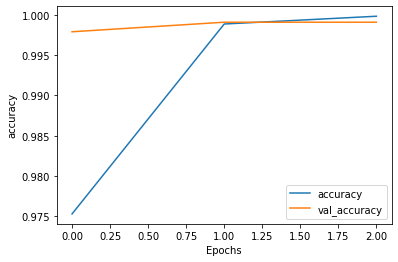

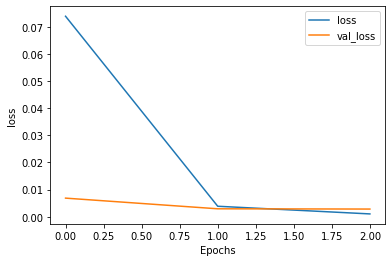

In [15]:
# visualizando os resultados
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Fazendo Previsões no Conjunto de Teste
Por fim, temos o pipeline ideal para tratar nossos dados, já treinamos, tunamos e obtivemos excelentes resultados em nosso conjunto de validação. Nosso modelo está pronto, mas ele tem mais uma missão a cumprir.

Vamos apresentar dados completamente novos a ele, fazer previsõs e ver como ele se sai.

In [16]:
# tratando os dados de teste
test_sequences = tokenizer.texts_to_sequences(np.array(test.text))
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen = max_length)

In [17]:
# fazendo previsões
preds = np.round(model.predict(test_padded))

351/351 [==============================] - 4s 12ms/step


In [18]:
# conferindo o tamanho do resultado
len(preds)

11225

In [19]:
# verificando a acurácia
acc = np.sum(1 if i==j else 0 for i,j in zip(preds, test["Target"].values)) / len(test)
print("Accuracy: ", acc )

Accuracy:  0.9989309576837416
